# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

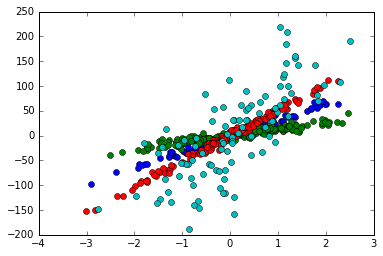

In [2]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=5)
(x1_test,y1_test) = make_regression(n_samples=n_samples/2, n_features=n_dimensions, noise=5)
plt.plot(x1,y1,'o')

############### More DATASETS

#Blue colour dataset
(x2,y2) = make_regression(n_samples=200, n_features=1, noise=5)
(x2_test,y2_test) = make_regression(n_samples=100, n_features=1, noise=5)
plt.plot(x2,y2,'o')
plt.plot(x2_test,y2_test,'o')

#Red colour dataset
(x3,y3) = make_regression(n_samples=100, n_features=1, noise=60)
(x3_test,y3_test) = make_regression(n_samples=50, n_features=1, noise=60)
plt.plot(x3,y3,'o')

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

x1_test= 0.769203862016
x1= 0.980670759972


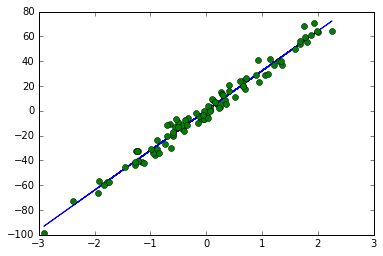

In [3]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print 'x1_test=', regr.score(x1_test,y1_test)
print 'x1=', regr.score(x1,y1)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

x2= 0.871576708972
x2_test= 0.444360076488


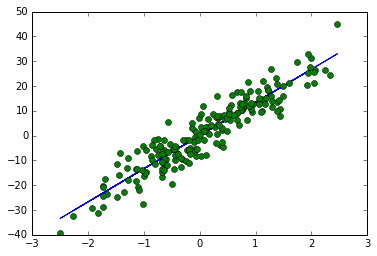

In [4]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x2,y2)

#Print the score that the fit has
print 'x2=', regr.score(x2,y2)
print 'x2_test=', regr.score(x2_test,y2_test)

#Plot the resulting line
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

x3 = 0.570259961824
x3_test = 0.344820230235


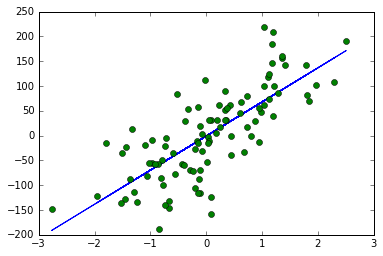

In [5]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x3,y3)

#Print the score that the fit has
print 'x3 =', regr.score(x3,y3)
print 'x3_test =', regr.score(x3_test,y3_test)

#Plot the resulting line
plt.plot(x3,regr.predict(x3))
plt.plot(x3,y3,'o')
plt.show()

## Your analysis

Increasing the amount of noise increases the average distance of points from the fitted line.
Decreasing the amount of noise decreases the average distance of points from the fitted line. 

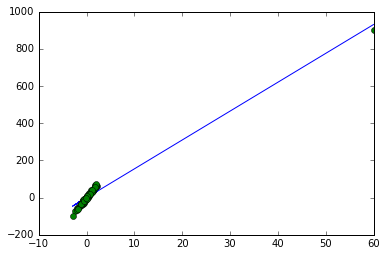

In [6]:
#Add a serious outlier and see what happens
x1[-1] = 60
y1[-1] = 900

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
#Creates the regression object
regr = LinearRegression()

#Fits the regression object to the data
regr.fit(x1,y1)

#Plots the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

#Fitted line drastically skewed!

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [7]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    predictor = theta0 + x*theta1
    return predictor

In [8]:
#Use the output of that function to compute the cost function J:
import numpy 
def cost_function(x_predict,y):
    m = len(y)
    cost = (1.0/(2*m)) * sum((x_predict - y)**2)
    return cost

In [9]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    m = len(y)
    grad0 = (1.0/m) * sum(x_predict - y)
    grad1 = (1.0/m) * sum((x_predict - y)*x)
    return grad0, grad1


In [12]:
#Generating sampling data (we could use x1 and y1 but given the datasets contained outliers, we prefer to 
#perform gradient descent on a new sample)
(x,y) = make_regression(n_samples=100, n_features=1, noise=5)

The last value of the cost function is:  15.0992382301
The amount of iterations is:  100
The parameters of theta0 and theta1 are respectively:  -0.506406147112 35.3388938838


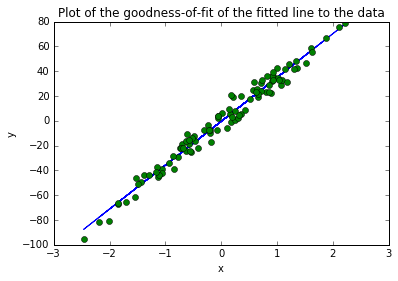

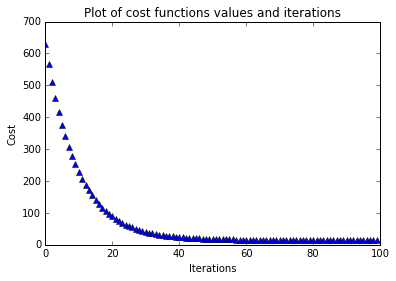

In [13]:
#Initialisation of learning rate and parameters
alpha = 0.05
theta0 = 0
theta1 = 1

#Using the .flatten() method to create a vector out of x
x = x.flatten()

#Number of iterations wished
iterations = 100

#Stop condition acts as a 'safety net' in case of extremely high amount of iterations wished
stopcondition = 0.1

#Initialising the cost and iteration counter
i = 0
cost = 10

cost_values = []
#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost > stopcondition):
    #Initialing h(x) for each iteration
    x_predict = prediction_function(x,theta0,theta1)
    i = i + 1
    
    # Updating parameters theta0 and theta1
    grad0, grad1 = compute_gradient(x_predict,y,x)
    theta0 = theta0 - alpha*grad0
    theta1 = theta1 - alpha*grad1
    
    #Saving the value of the cost function for each iteration
    cost_values.append(cost_function(x_predict, y))

final_cost = cost_function(x_predict, y)

print "The last value of the cost function is: ", final_cost 
print "The amount of iterations is: ", i
print "The parameters of theta0 and theta1 are respectively: ", theta0, theta1

#Plotting result of gradient descent algorithm, which the data superimposed to the fitted line
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.title('Plot of the goodness-of-fit of the fitted line to the data')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

#Plotting the evolution of the cost function during iterations
plt.plot(range(0,i),cost_values, '^')
plt.title('Plot of cost functions values and iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

Depending on the noise, about 20-40 iterations are necessary to obtain a good result, 100 with high confidence levels. The learning rate has some sort of a threshhold value (which varies according to sample characteristics) above which the linear regression fit becomes nonsensical. A small learning rate induces a less steep decrease of the cost function. 

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.